# Looi Kah Fung_Lab 3 Decision Tree_P-COM0049/22

Business understanding
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Data understanding 

Attribute: 
Quantative attribute 
variance of Wavelet Transformed image- continuous
skewness of Wavelet Transformed image- continuous
curtosis of Wavelet Transformed image- continous   
entropy of image- continous

Qualitative attribute
class - nominal, binary 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')                                                            
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("banknote.csv", names=['variance of Wavelet Transformed image ','skewness of Wavelet Transformed image ','curtosis of Wavelet Transformed image','entropy of image ','class'])


In [4]:
df.describe()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.head(5)

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Data preprocessing 

In [6]:
df.isnull().sum()

variance of Wavelet Transformed image     0
skewness of Wavelet Transformed image     0
curtosis of Wavelet Transformed image     0
entropy of image                          0
class                                     0
dtype: int64

In [7]:
# degree of imbalance degree of imbalance vs proportion of minority class (mild - 20~40% of the dataset, moderate - 1-20% of the dataset, extreme - <1% of the dataset)
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Skewd class proportions - imbalance 
1. Downsampling - training on a disproportionately low subset of the majority class examples.
2. Upweighting - adding an example weight to the downsampled class equal to the factor by which you downsampled. 
(mild - 20~40% of the dataset, moderate - 1-20% of the dataset, extreme - <1% of the dataset)

https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=A%20classification%20data%20set%20with,smaller%20proportion%20are%20minority%20classes.

Proportion of binary class "1" vs total population is 44.45%. The dataset denotes as balance. 

<AxesSubplot:xlabel='class', ylabel='count'>

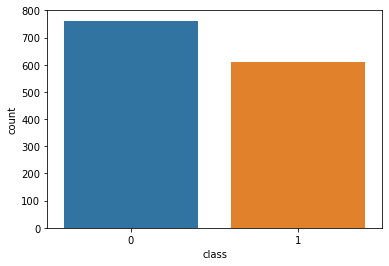

In [8]:
#count rows of each classes
sns.countplot(x="class", data=df)

(5.5, -0.5)

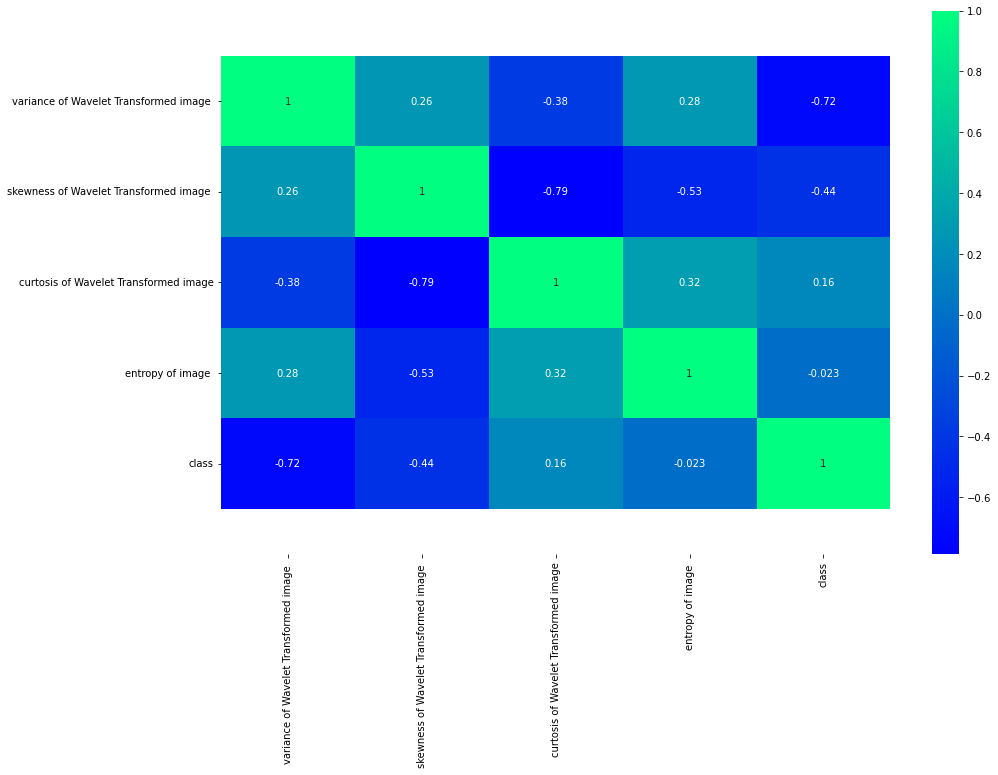

In [9]:
#correlations using heat map plot - CART(correlation, regression)
plt.figure(figsize=(15,10))
ax= sns.heatmap(df.corr(),annot=True,cmap='winter',cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)

General speaking, a Pearson coefficient value grater than 0.7 indicates the presence of multi-collinearity. 
Attribute such as variance of Wavelet Transformed image, skewness of Wavelet Transformed image, curtosis of Wavelet Transformed image are useful to the dataset as we can observe from the correlation heatmap; curtosis of Wavelet Transformed image & class are having strong negative correlation, skewness of Wavelet Transformed image & curtosis of Wavelet Transformed image are having strong negative correlation whereas entropy doesn't display a strong collinear between those attributes either positive or negative. 


https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/

Data modelling- decison tree and evaluation- confusion matrix 

In [10]:
#Training dataset 
#select all columns except the last one 
X= df.drop("class", axis=1)
#set target categorical data label (6th attribute)
y= df["class"]

#train-test split - 70/30 ratio
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42, stratify=y) #data imbalance, add a new argument stratify = y 

In [11]:
print('-------- x axis test ----------')
print(X_test)
print('-------- x axis train ---------')
print(X_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
      variance of Wavelet Transformed image   \
484                                  4.74320   
1367                                 0.40614   
711                                  1.72570   
1072                                -1.36600   
130                                  3.26970   
...                                      ...   
492                                 -1.84110   
325                                  4.45490   
966                                  0.48797   
872                                 -0.95403   
1042                                -5.16610   

      skewness of Wavelet Transformed image   \
484                                  2.10860   
1367                                 1.34920   
711                                 -4.46970   
1072                                 0.18416   
130                                 -4.34140   
...                                      ...   
492                                 10.83060   
325    

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

The prediction accuracy is: 98.79%


Text(0.5, 51.0, 'Predicted label')

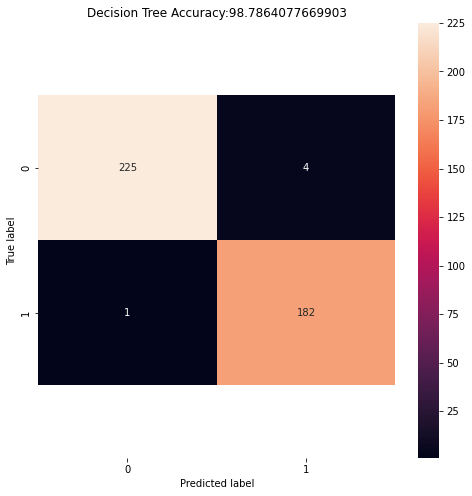

In [12]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 42, criterion = 'gini').fit(X_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(X_test)

print (classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(X_test,y_test)*100,"%"))


# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

Data visualizing:  

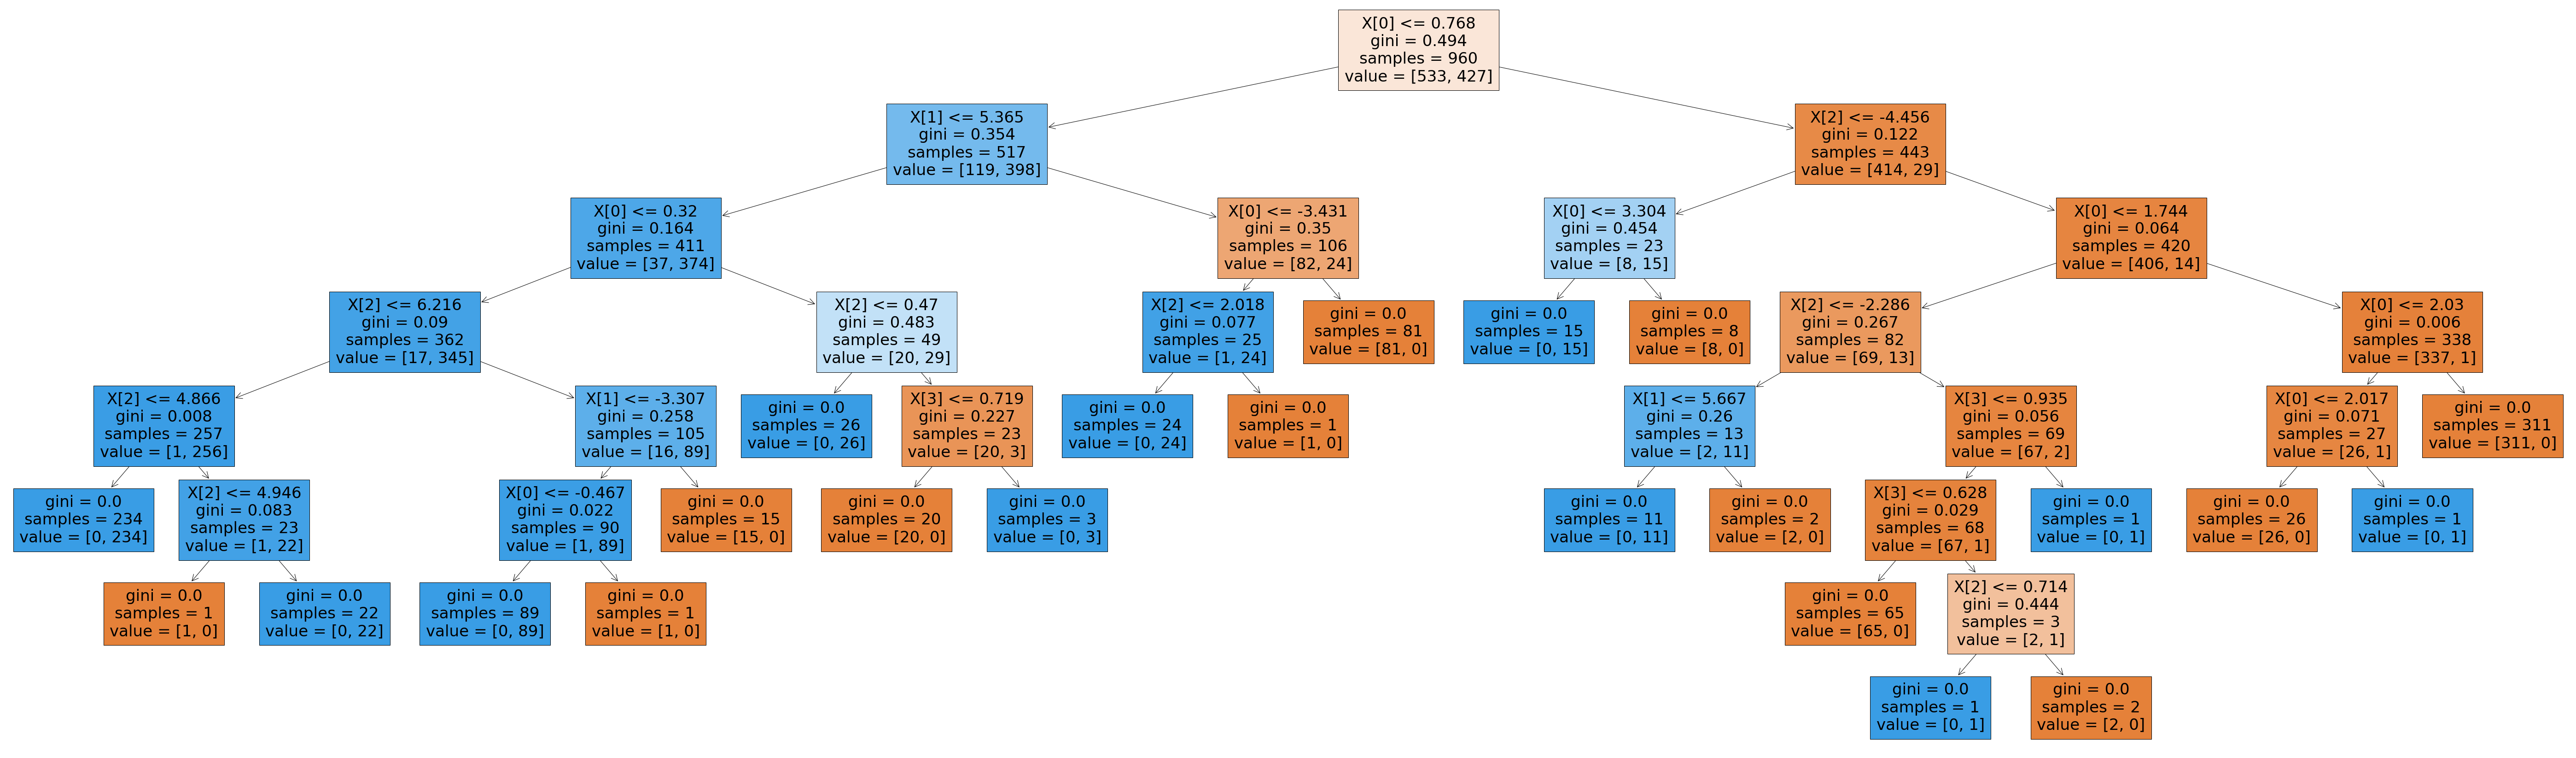

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = ['variance of Wavelet Transformed image ','skewness of Wavelet Transformed image ','curtosis of Wavelet Transformed image','entropy of image ']
cn = ["0","1"]
fig = plt.figure(figsize=(100,30))
_ = plot_tree(dtree,filled=True)
fig.savefig('imagename.svg')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       229
           1       0.99      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

The prediction accuracy is: 99.27%


Text(0.5, 51.0, 'Predicted label')

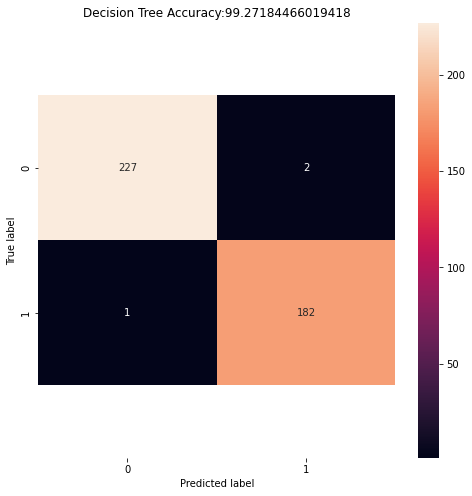

In [14]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 42, criterion = 'entropy').fit(X_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(X_test)

print (classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(X_test,y_test)*100,"%"))


# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

Question 1: refer to the comment at each markdown 

Question 2: Comparison hyperparameter of decison tree, gini vs entropy, after computing both of the hyperparameters, entropy criterion shown a higher prediction accuracy of 99.27%. 
https://quantdare.com/decision-trees-gini-vs-entropy/
https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/#:~:text=The%20range%20of%20Entropy%20lies,for%20selecting%20the%20best%20features.
